In [1]:
import torch

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在计算$y$关于$X$的梯度之前，我们需要一个地方来存储梯度

In [3]:
# 等价于x=torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad # 默认是None

现在计算$y$

In [4]:
y = 2 * x.dot(x)
y

tensor(28., grad_fn=<MulBackward0>)

此时通过调用反向传播函数来自动计算$y$关于$X$每个分量的梯度

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算$X$的另一个函数

In [7]:
# 默认情况下， Pytorch会累积梯度，所以需要清空之前的梯度值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

在深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和

In [8]:
# 对非标量调用'backward'需要传入一个gradient参数，该参数指定微分函数关于`self`的梯度。在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
y.backward(gradient=[torch.ones(4)])
x.grad

tensor([0., 2., 4., 6.])

可以把一些计算移动到记录的计算图之外

In [9]:
x.grad.zero_()
y = x * x
# 这里detach相当于把y的值赋给u，u不是计算图中的一个函数了，只是一个常数
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到变量梯度

In [11]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=[], requires_grad=True)
print(a)
d = f(a)
d.backward()
a.grad

tensor(0.0680, requires_grad=True)


tensor(16384.)

绘制$y=sin(x)$函数

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = torch.arange(-6, 6, 0.2)
x.requires_grad_(True)

tensor([-6.0000, -5.8000, -5.6000, -5.4000, -5.2000, -5.0000, -4.8000, -4.6000,
        -4.4000, -4.2000, -4.0000, -3.8000, -3.6000, -3.4000, -3.2000, -3.0000,
        -2.8000, -2.6000, -2.4000, -2.2000, -2.0000, -1.8000, -1.6000, -1.4000,
        -1.2000, -1.0000, -0.8000, -0.6000, -0.4000, -0.2000,  0.0000,  0.2000,
         0.4000,  0.6000,  0.8000,  1.0000,  1.2000,  1.4000,  1.6000,  1.8000,
         2.0000,  2.2000,  2.4000,  2.6000,  2.8000,  3.0000,  3.2000,  3.4000,
         3.6000,  3.8000,  4.0000,  4.2000,  4.4000,  4.6000,  4.8000,  5.0000,
         5.2000,  5.4000,  5.6000,  5.8000], requires_grad=True)

In [14]:
y = torch.sin(x)
y.sum().backward()

In [15]:
x1 = x.detach()
y1 = torch.sin(x1)

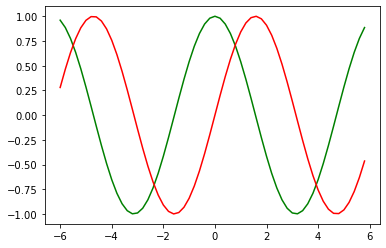

In [16]:
plt.plot(x1, x.grad, color='green')
plt.plot(x1, y1, color='red')
plt.show()